In [1]:
import numpy as np
import pandas as pd

In [2]:
#col_names = ["DestinationPort","FlowDuration","TotalFwdPackets","TotalBackwardPackets","TotalLengthofFwdPackets","TotalLengthofBwdPackets","FwdPacketLengthMax","FwdPacketLengthMin","FwdPacketLengthMean","FwdPacketLengthStd","BwdPacketLengthMax","BwdPacketLengthMin","BwdPacketLengthMean","BwdPacketLengthStd","FlowBytes/s","FlowPackets/s","FlowIATMean","FlowIATStd","FlowIATMax","FlowIATMin","FwdIATTotal","FwdIATMean","FwdIATStd","FwdIATMax","FwdIATMin","BwdIATTotal","BwdIATMean","BwdIATStd","BwdIATMax","BwdIATMin","FwdPSHFlags","BwdPSHFlags","FwdURGFlags","BwdURGFlags","FwdHeaderLength","BwdHeaderLength","FwdPackets/s","BwdPackets/s","MinPacketLength","MaxPacketLength","PacketLengthMean","PacketLengthStd","PacketLengthVariance","FINFlagCount","SYNFlagCount","RSTFlagCount","PSHFlagCount","ACKFlagCount","URGFlagCount","CWEFlagCount","ECEFlagCount","Down/UpRatio","AveragePacketSize","AvgFwdSegmentSize","AvgBwdSegmentSize","FwdHeaderLength","FwdAvgBytes/Bulk","FwdAvgPackets/Bulk","FwdAvgBulkRate","BwdAvgBytes/Bulk","BwdAvgPackets/Bulk","BwdAvgBulkRate","SubflowFwdPackets","SubflowFwdBytes","SubflowBwdPackets","SubflowBwdBytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd","min_seg_size_forward","ActiveMean","ActiveStd","ActiveMax","ActiveMin","IdleMean","IdleStd","IdleMax","IdleMin","Label"]
data = pd.read_csv('02-16-2018.csv', sep=",")#names=col_names)
data.head(3)

C:\Users\thobani_radebe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,138.592929,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,263.750829,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0.0,2624734,2624734,9058214.0,0.0,9058214,9058214,Benign


In [3]:
print(data['Label'].value_counts(sort=1))

DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Label                            1
Name: Label, dtype: int64


In [4]:
data.Label[data.Label == 'Benign'] = 1
data.Label[data.Label == 'DoS attacks-Hulk'] = 0
data.Label[data.Label == 'DoS attacks-SlowHTTPTest'] = -1
data['Label'].value_counts()

0        461912
1        446772
-1       139890
Label         1
Name: Label, dtype: int64

In [5]:
#data = data.apply(pd.to_numeric)
#data.iloc[21838]  
lis = []
lis = data[data['Dst Port']=='Dst Port'].index.values
print(lis)

[999999]


In [6]:
for i in lis:
    #print(data.loc[i, "Dst Port"], data.loc[i, "Protocol"])
    #if type(data.loc[i, "Dst Port"]) != int or type(data.loc[i, "Dst Port"]) != float:
    data=data.drop(i)

In [7]:
data.shape
#data = data.apply(pd.to_numeric)

(1048574, 80)

In [8]:
def clean_dataset(data):
  assert isinstance (data, pd.DataFrame)
  data.dropna(inplace=True)
  indices_to_keep=~data.isin([np.nan, np.inf, -np.inf]).any(1)
  return data[indices_to_keep].astype(np.double)
data = data.drop(labels=['Timestamp'], axis=1)
data = clean_dataset(data)

In [9]:
data = data.apply(pd.to_numeric)
print(data.select_dtypes(exclude='number').columns)

Index([], dtype='object')


In [10]:
#Y = data.iloc[:,78]
Y = data['Label']
print(Y)
#X = data.drop(data.columns[78],axis=1)
X = data.drop(labels=['Label'], axis=1)

#print(X)
print(X.shape)
print(Y.shape)

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1048570   -1.0
1048571   -1.0
1048572   -1.0
1048573   -1.0
1048574   -1.0
Name: Label, Length: 1048574, dtype: float64
(1048574, 78)
(1048574,)


In [11]:
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size= 0.3,random_state=20)
len(ytest)
K = math.sqrt(len(ytest))
K
if(K > 500):
    K = 99
if(int(K)%2 == 0):
    K = K-1

print(K,"The int version is", int(K))    

99 The int version is 99


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=int(K))
knn_model.fit(xtrain,ytrain)
knn_model.score(xtest,ytest)

0.9982961029713294

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     42056
         0.0       1.00      1.00      1.00    138441
         1.0       1.00      1.00      1.00    134076

    accuracy                           1.00    314573
   macro avg       1.00      1.00      1.00    314573
weighted avg       1.00      1.00      1.00    314573



[[ 42056      0      0]
 [    14 138171    256]
 [     4    262 133810]]




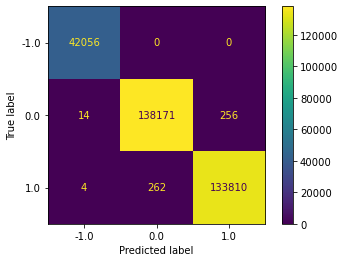

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
Pred = knn_model.predict(xtest)
print(classification_report(ytest,Pred))
plot_confusion_matrix(knn_model,xtest,ytest)
print("\n")
print(confusion_matrix(ytest,Pred))
print("\n")

C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


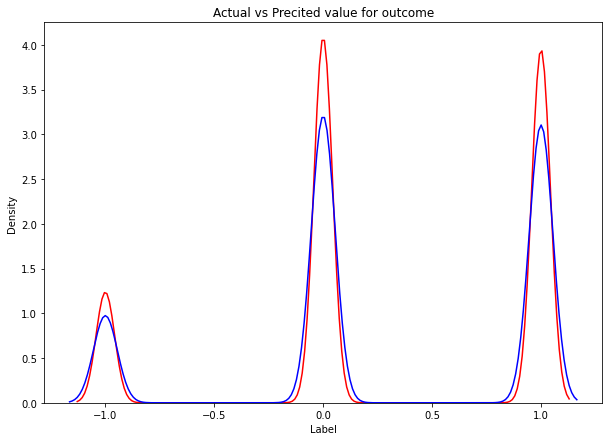

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
ax = sns.distplot(data.iloc[:,78], hist=False, color="r", label="Actual Value")
sns.distplot(Pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()